In [21]:
#Setup and data loading
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Load the dataset
#file_path = 'marketing_and_product_performance.csv'
df = pd.read_csv(r"C:\Users\arpit\Downloads\marketing_and_product_performance.csv")

# Inspect the data to make sure it's loaded correctly
print(df.head())
df.info()

  Campaign_ID   Product_ID    Budget  Clicks  Conversions  Revenue_Generated  \
0  CMP_RLSDVN  PROD_HBJFA3  41770.45    4946           73           15520.09   
1  CMP_JHHUE9  PROD_OE8YNJ  29900.93     570          510           30866.17   
2  CMP_6SBOWN  PROD_4V8A08  22367.45    3546          265           32585.62   
3  CMP_Q31QCU  PROD_A1Q6ZB  29957.54    2573          781           95740.12   
4  CMP_AY0UTJ  PROD_F57N66  36277.19     818           79           81990.43   

    ROI  Customer_ID Subscription_Tier  Subscription_Length Flash_Sale_ID  \
0  1.94  CUST_1K7G39           Premium                    4  FLASH_1VFK5K   
1  0.76  CUST_0DWS6F           Premium                    4  FLASH_1M6COK   
2  1.41  CUST_BR2GST             Basic                    9  FLASH_J4PEON   
3  3.32  CUST_6TBY6K           Premium                   32  FLASH_1TOVXT   
4  3.53  CUST_XASI45          Standard                   29  FLASH_AOBHXL   

   Discount_Level  Units_Sold    Bundle_ID  Bundle_Price

In [22]:
#Analysis Correlation
# Define the columns for sentiment and engagement
sentiment_col = 'Customer_Satisfaction_Post_Refund'
engagement_cols = ['Clicks', 'Conversions']

# Calculate correlations
corr_clicks = df[sentiment_col].corr(df[engagement_cols[0]])
corr_conversions = df[sentiment_col].corr(df[engagement_cols[1]])

print(f"Correlation between 'Satisfaction' and 'Clicks': {corr_clicks:.4f}")
print(f"Correlation between 'Satisfaction' and 'Conversions': {corr_conversions:.4f}")

Correlation between 'Satisfaction' and 'Clicks': -0.0030
Correlation between 'Satisfaction' and 'Conversions': 0.0020


Heatmap saved as 'sentiment_clicks_heatmap.png'


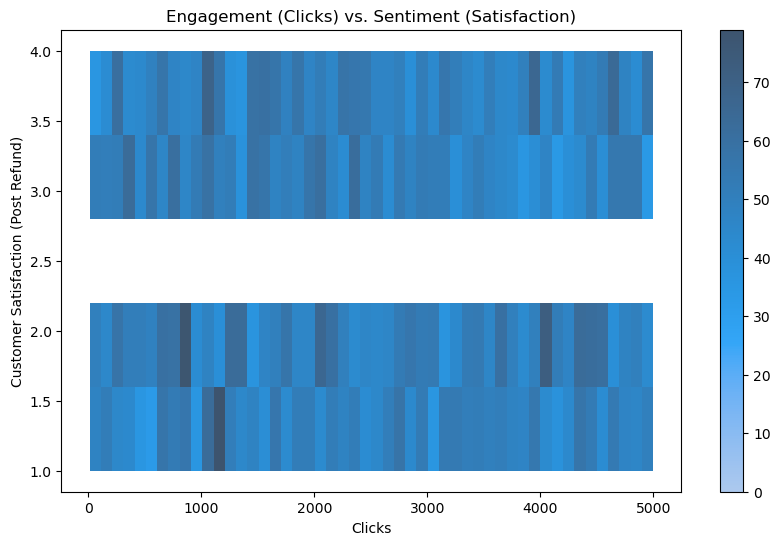

In [23]:
#Heatmap_Plot

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the 2D histogram / heatmap
sns.histplot(data=df, 
             x='Clicks', 
             y='Customer_Satisfaction_Post_Refund', 
             bins=(50, 5),  # Bins for x-axis, Bins for y-axis
             cbar=True)     # Show the color bar

plt.title('Engagement (Clicks) vs. Sentiment (Satisfaction)')
plt.xlabel('Clicks')
plt.ylabel('Customer Satisfaction (Post Refund)')

# Save the figure to a file
plt.savefig('sentiment_clicks_heatmap.png')
print("Heatmap saved as 'sentiment_clicks_heatmap.png'")

In [24]:
#Analysis 2: Statistical Tests (Regression & ANOVA)
#A. Linear_Regression
# Fit the Ordinary Least Squares (OLS) regression model
import statsmodels.formula.api as smf

model = smf.ols('Revenue_Generated ~ Budget', data=df).fit()

# Print the full summary
print("\n--- Linear Regression Summary (Revenue_Generated ~ Budget) ---")
print(model.summary())


--- Linear Regression Summary (Revenue_Generated ~ Budget) ---
                            OLS Regression Results                            
Dep. Variable:      Revenue_Generated   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.611
Date:                Fri, 31 Oct 2025   Prob (F-statistic):             0.0318
Time:                        00:55:26   Log-Likelihood:            -1.1678e+05
No. Observations:               10000   AIC:                         2.336e+05
Df Residuals:                    9998   BIC:                         2.336e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [25]:
#Anova
# Get the unique categories
categories = df['Subscription_Tier'].unique()
    
# Create a list of ROI data for each category
groups = []
for tier in categories:
    groups.append(df[df['Subscription_Tier'] == tier]['ROI'])
        
# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print(f"\n--- ANOVA (ROI by Subscription_Tier) ---")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: There IS a statistically significant difference in ROI.")
else:
    print("Result: There is NO statistically significant difference in ROI.")


--- ANOVA (ROI by Subscription_Tier) ---
F-Statistic: 1.8313
P-Value: 0.1603
Result: There is NO statistically significant difference in ROI.


In [34]:
#Analysis 3: Visualize Hype Distribution
# Create the box plot using Altair
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
chart = alt.Chart(df).mark_boxplot().encode(
    # Set the x-axis to be the 'domains'
    x=alt.X('Common_Keywords', title='Product Domain (Keywords)'),
    
    # Set the y-axis to be the 'hype'
    y=alt.Y('Clicks', title='Hype (Clicks)'),
    
    # Add tooltips to see details on hover
    tooltip=['Common_Keywords', alt.Tooltip('Clicks', format=',.0f')]
).properties(
    title='Hype (Clicks) Distribution Across Product Domains'
).interactive() # Make the chart zoomable and pannable

# Save the chart as a JSON file
chart_json_path = 'hype_distribution_boxplot.json'
chart.save(chart_json_path)
print(f"Box plot saved as '{chart_json_path}'")

Box plot saved as 'hype_distribution_boxplot.json'
